### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency
vehicles = pd.read_csv('../datasets/vehicles.csv', sep=',')

In [43]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [38]:
# Size vs Cylinders 
# Verwachte correlatie: Ik denk dat er wel een correlatie zal zijn.
# Auto's met meer cylinders betekent vaak een grotere motor, waardoor de auto ook groter zal moeten zijn. 
vehiclesContingencyTable = create_contingency_table(vehicles, 'size','cylinders')

In [37]:
# Hier zie je goed terug dat het aantal cylinders wel impact heeft op de grootte van de auto. 
# Bij 10 & 12 cylinders zie je bijvoorbeeld geen sub-compact modellen. 8 cylinders is vooral aanwezig in full-size modellen.
vehiclesContingencyTable

size,compact,full-size,mid-size,sub-compact
cylinders,,,,
10 cylinders,3,85,3,0
12 cylinders,1,3,7,0
3 cylinders,22,8,4,5
4 cylinders,1502,1018,1953,187
5 cylinders,39,34,50,6
6 cylinders,324,2311,1509,45
8 cylinders,141,3139,376,27
other,83,42,15,11


<AxesSubplot:xlabel='cylinders'>

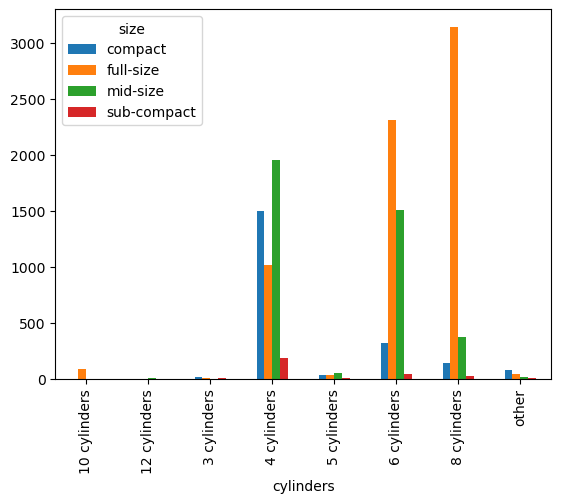

In [39]:
# Hier is ook duidelijk te zien dat de 4 cylinder het meeste voorkomt voor alle modellen. 
vehiclesContingencyTable.plot(kind='bar')

In [44]:
# Deze berekening geeft ook duidelijk aan dat er een correlatie is tussen de size en cylinders. 
check_cat_vs_cat_correlation(vehicles, 'size','cylinders')

The odds of a correlation between size and cylinders is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.
